In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [2]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.



In [3]:
all_variables_3L = xr.open_dataset('all_variables_3L_aug2020.nc')
all_variables_T3 = all_variables_3L.stack(St=('S','time'))
all_variables_T3 = all_variables_T3.swap_dims({'St':'target_time'})
all_variables_T3 = all_variables_T3.unstack()


In [4]:
# Generate target time to check on L dependnece 
target_all = pd.date_range('1900-01-01', periods=365, freq='D')
target_all = [pd.DatetimeIndex([it]) for it in target_all]
# target_all

# Here I use only 1 range of L=14-33

In [7]:
# looping through the target dates for climatologies
ds_clim_test_3d_all = []
for iT in target_all:
    print(iT,)
    # extract values that correspond to the target dates
    temp = all_variables_T3.where((all_variables_T3.target_time.dt.month==iT.month.values[0])&
                              (all_variables_T3.target_time.dt.day==iT.day.values[0]), drop=True)
    
    # bits to extract the S and t of each target_time
    y_ls = [y for (x,y) in temp.St.values]
    y_arr = np.array(y_ls)
    # loop through the 3 types of lead times
    # I have the -1 because of the way the timedelta is centered at 0 day and 12hours for day 1
#     for different_lead1, different_lead2 in zip(np.array([1,7,13])-1, np.array([5,11,17])-1 ):
#     for different_lead1, different_lead2 in zip(np.array([2,4,6,8])-1, np.array([10,12,14,16])-1 ):
    firststep=0
    for different_lead1, different_lead2 in zip(np.array([14])-1, np.array([33])-1 ):
        firststep+=1
#         print(y_arr[(y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D'))])
        temp2 = temp.sel(target_time=
                         (y_arr>np.timedelta64(different_lead1,'D'))&(y_arr<np.timedelta64(different_lead2,'D')))
        temp3 = temp2.stack(Mtt=('M','target_time'))
#         temp3 = temp3.load()
#         print(temp3.pr_sfc.values.shape)
        temp3 = temp3.quantile(dim=['Mtt'], q=[0.5,0.667,0.75])
        temp3 = temp3.expand_dims('Lbeg')
        temp3.coords['Lbeg'] = 'Lbeg', [np.str(different_lead1+1)+'-'+np.str(different_lead2+1)] #np.atleast_1d(different_lead1+1)
#         print(temp3)
#         if different_lead1==3: #whatever first value of different_lead1
        if firststep==1: #whatever first value of different_lead1
            ds_quantile = temp3*1.
        else:
            ds_quantile = xr.merge([ds_quantile,temp3])
    ds_quantile = ds_quantile.expand_dims('target_clim')
    ds_quantile.coords['target_clim'] = 'target_clim', np.atleast_1d(iT)
    ds_clim_test_3d_all.append(ds_quantile)
ds_clim_test_3d_all = xr.combine_by_coords(ds_clim_test_3d_all)    


DatetimeIndex(['1900-01-01'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-02'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-03'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-04'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-05'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-06'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-07'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-08'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-09'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-10'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-11'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-01-1

DatetimeIndex(['1900-05-08'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-09'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-10'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-11'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-16'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-17'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-18'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-19'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-20'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-21'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-22'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-05-2

DatetimeIndex(['1900-09-12'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-13'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-14'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-16'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-17'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-18'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-19'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-20'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-21'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-22'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-23'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-24'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-25'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-26'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1900-09-2

# FITTING PROCEDURES

In [8]:
def fffourier(x, *a):
    '''harmonic just with cosine'''
    tau = 366
    ret = a[1] * np.cos(2* np.pi / tau * x)
    for deg in range(2, len(a)):
        ret += a[deg] * np.cos((deg) *2* np.pi / tau * x)
    return ret +a[0]

In [9]:
def fffourierB(x, *a_in):
    '''harmonic with np.exp(sum(sine and cosine))'''
    a_0 = a_in[0]
    len_a = len(a_in)-1
#     print(len_a, int(len_a/2))
    if len_a==3:
        a = a_in[1]
        b = a_in[2]
    else:
        a = a_in[1:int(len_a/2+1)]
        b = a_in[int(len_a/2+1):]
#     print(a,b)
    tau = 365.25
    nu = 2*np.pi/tau
    ret = a_0
    for deg in range(0,int(len_a/2)):
#         print(deg)
#         print(a[deg] , b[deg] )
        ret += a[deg] * np.sin((deg+1) * nu * x) + b[deg] * np.cos((deg+1) * nu * x)
#     if any(np.abs(a))>=19:
#         ret*=10000
#     if any(np.abs(b))>=19:
#         ret*=10000
    return np.exp(ret)

In [10]:
def apply_fffourier(dsin):
    x = dsin.target_clim.dt.dayofyear.values
#     print(dsin)
#     print(x.shape)
    popt = dsin.H.values
    out = fffourierB(x, *popt)
#     print(out)
#     pause
#     print(popt)
    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(out)


In [11]:
from scipy.optimize import curve_fit


In [12]:
def apply_fit_curve_cauchy(dsin):
#     print(dsin.coords)
#     print(loss_f[:])
#     pause
    x = dsin.target_clim.dt.dayofyear.values
#     print(x.shape)
    y = dsin.pr_sfc.values[:,0]
    if np.sum(np.isnan(y))==0:
        y[y<0]=0

#         try:
#             num_armonics = 9
#             popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-15,15])
#         except:
#         try:
        num_armonics = 7
        popt, pcov = curve_fit(fffourierB, x,y, [0.0] * num_armonics, bounds=[-20,20], 
                               max_nfev=3000, loss='cauchy')
#         except:
#             try:
#                 num_armonics = 5
#                 print(5)
#                 print(dsin.coords)
#                 popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-20,20],
#                                         max_nfev=3000, loss='cauchy')
#             except:
#                 try:
#                     num_armonics = 3
#                     print(3)
#                     print(dsin.coords)
#                     popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-20,20], 
#                                             max_nfev=3000, loss='cauchy')
#                 except:
#                     print('failed', dsin)
#                     popt = np.nan*np.ones(3)
    else:
        popt=np.nan*np.ones(7)
        num_armonics = 7

    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(popt, coords=[np.arange(0,num_armonics)], dims='harmonic')


In [13]:
def apply_fit_curve_soft(dsin):
#     print(loss_f[:])
#     pause
    x = dsin.target_clim.dt.dayofyear.values
#     print(x.shape)
    y = dsin.pr_sfc.values[:,0]
    
    if np.sum(np.isnan(y))==0:
        y[y<0]=0

#         try:
#             num_armonics = 9
#             popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-15,15])
#         except:
        try:
            num_armonics = 7
            popt, pcov = curve_fit(fffourierB, x,y, [0.0] * num_armonics, bounds=[-20,20], max_nfev=3000)
        except:
            try:
                num_armonics = 5
                print(5)
                print(dsin.coords)
                popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-20,20],
                                        max_nfev=3000)
            except:
                try:
                    num_armonics = 3
                    print(3)
                    print(dsin.coords)
                    popt, pcov = curve_fit(fffourierB, x,y[:,0], [0.0] * num_armonics, bounds=[-20,20], 
                                            max_nfev=3000)
                except:
                    print('failed', dsin)
                    popt = np.nan*np.ones(3)
    else:
        popt=np.nan*np.ones(7)
        num_armonics = 7

    # we need to return a dataarray or else xarray's groupby won't be happy
    return xr.DataArray(popt, coords=[np.arange(0,num_armonics)], dims='harmonic')


# Apply curve fit


In [14]:
ds_clim_test_3d_all

<xarray.Dataset>
Dimensions:      (Lbeg: 1, lat: 28, lon: 71, quantile: 3, target_clim: 365)
Coordinates:
  * lon          (lon) float32 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * Lbeg         (Lbeg) <U5 '14-33'
  * lat          (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 26.0 25.0 24.0 23.0
  * quantile     (quantile) float64 0.5 0.667 0.75
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, quantile, lat, lon) float64 18.97 ... 7.607

In [19]:
# stacked = ds_clim_test_3d_all.where(ds_mask.the_geom>0).isel(quantile=slice(-1, None)).stack(
stacked = ds_clim_test_3d_all.where(ds_mask.the_geom>0).stack(
    allpoints=['Lbeg','quantile','lat','lon'])  
trend = stacked.groupby('allpoints').apply(apply_fit_curve_cauchy)
trend_unstacked = trend.unstack('allpoints')

In [20]:
trend_unstacked = trend_unstacked.rename({'allpoints_level_0':'Lbeg',
                                          'allpoints_level_1':'quantile',
                                          'allpoints_level_2':'lat',
                                         'allpoints_level_3':'lon'})
trend_unstacked = trend_unstacked.to_dataset(name='H')
trend_unstacked.coords['target_clim'] = 'target_clim', stacked.target_clim.values

In [21]:
#trend_unstacked.to_netcdf('harmonics_from_quantiles_cauchy_oct2020_moreQ.nc')


# Rebuild data based on coefficients

In [22]:
stack1 = trend_unstacked.stack(allpoints=['Lbeg','quantile','lat','lon'])  
smooth_clim = stack1.groupby('allpoints').apply(apply_fffourier)
smooth_clim = smooth_clim.unstack('allpoints')
smooth_clim = smooth_clim.rename({'dim_0':'target_clim'})
smooth_clim.coords['target_clim'] = 'target_clim',stacked.target_clim.values
smooth_clim_cauchy = smooth_clim.to_dataset(name='pr_sfc')

In [23]:
smooth_clim_cauchy

<xarray.Dataset>
Dimensions:      (Lbeg: 1, lat: 28, lon: 71, quantile: 3, target_clim: 365)
Coordinates:
  * Lbeg         (Lbeg) object '14-33'
  * quantile     (quantile) float64 0.5 0.667 0.75
  * lat          (lat) float64 23.0 24.0 25.0 26.0 27.0 ... 47.0 48.0 49.0 50.0
  * lon          (lon) float64 230.0 231.0 232.0 233.0 ... 298.0 299.0 300.0
  * target_clim  (target_clim) datetime64[ns] 1900-01-01 ... 1900-12-31
Data variables:
    pr_sfc       (target_clim, Lbeg, quantile, lat, lon) float64 nan nan ... nan

/local/ERAin/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


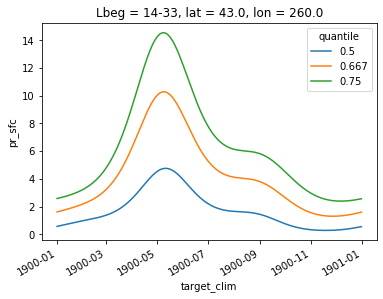

In [24]:
smooth_clim_cauchy.pr_sfc[:,0,:,20,30].plot.line(x='target_clim')

In [25]:
smooth_clim_cauchy.to_netcdf('smooth_clim_cauchy_oct2020_moreQ.nc')